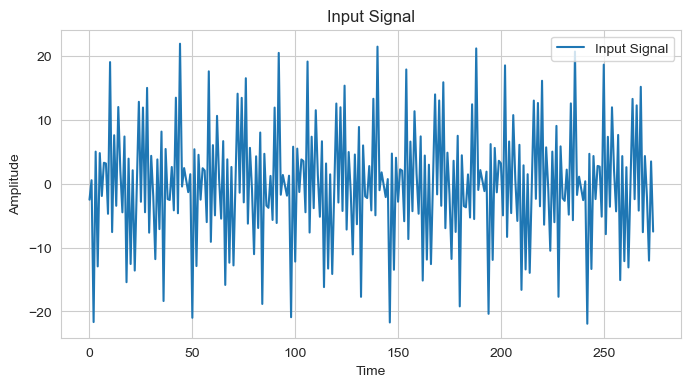

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style(style='whitegrid')

def plot_graph(input_array, title):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label=title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_input_output(input_array, output_array):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label='Input')
    plt.plot(output_array, label='Output')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Input vs Output')
    plt.legend()
    plt.show()

inputSignal = np.loadtxt('noise.csv', delimiter=',', dtype=float)

plot_graph(inputSignal[25:300], title="Input Signal")

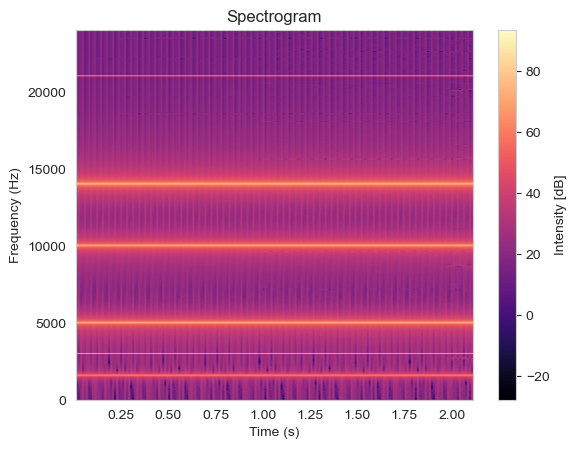

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def load_spectrogram_data(filename):
    # Load data from CSV file, skipping the first row
    data = np.loadtxt(filename, delimiter=',', dtype=float, skiprows=1)

    # Extract time, frequency, and spectrogram data
    time = data[:, 0]
    freq_values = [0, 48000 / 2]
    spectrogram_data = data[0:, 1:]  # Exclude the first row (frequency values)

    return time, freq_values, spectrogram_data

# Load spectrogram data from CSV file
filename = 'spectrogram.csv'
time, freq_values, spectrogram_data = load_spectrogram_data(filename)

# Transpose the data matrix to rotate 90 degrees anticlockwise
spectrogram_data = np.rot90(spectrogram_data)

# Plot spectrogram with frequency values on the y-axis
plt.imshow(spectrogram_data, aspect='auto', cmap='magma', extent=[time[0], time[-1], freq_values[0], freq_values[-1]])
plt.colorbar(label='Intensity [dB]')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.grid(False)
plt.show()

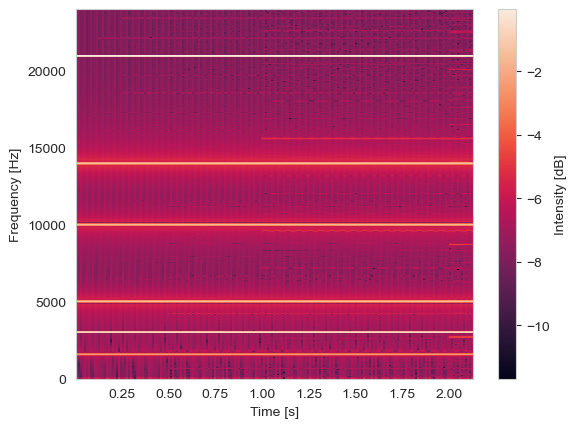

In [6]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Generate spectrogram
fs = 48000
nperseg = 1024  # Length of each segment
noverlap = nperseg*0.5  # Overlap between segments
nfft = 1024

f, t, Sxx = scipy.signal.spectrogram(inputSignal, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft, window='hamming')

# Plot spectrogram
plt.pcolormesh(t, f, np.log10(Sxx))  # Convert to dB
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Intensity [dB]')
plt.show()